# Lab #2A
___

**Task:** Train a Perceptron with Rosenblatt's algorithm
          for given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron
from sklearn.linear_model import Perceptron as skl_perc
from sklearn.model_selection import train_test_split
from misc.estimators import accuracy, contingency_table, precision, recall

def visualize_perceptron(coeffs: np.ndarray,
                         X: np.ndarray,
                         Y: np.ndarray) -> None:
      X1 = X[Y == 0]
      X2 = X[Y == 1]

      a, b, c = coeffs
      min_x = min(np.min(X1[0]), np.min(X2[0]))
      max_x = max(np.max(X1[0]), np.max(X2[0]))
      min_y = -(c + a * min_x) / b
      max_y = -(c + a * max_x) / b

      plt.scatter(X1[:, 0], X1[:, 1], marker="o")
      plt.scatter(X2[:, 0], X2[:, 1], marker="x")
      plt.plot([min_x, max_x], [min_y, max_y])

      # plt.show()

## Dataset reading and describing
___

_Dataset is given in lab task_

In [2]:
data = pd.read_csv("../datasets/data10.csv", sep=";", header=None).to_numpy()

## Dividing dataset on train and test data
___

Let's shuffle given data and divide it on train and test data in a ratio 4:1:

In [3]:
X, Y = data[:, :-1], data[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

## Dataset visualization

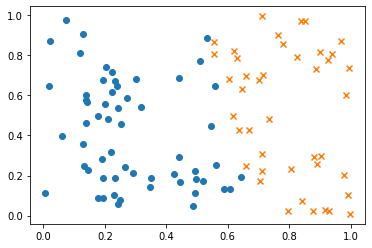

In [4]:
X1 = X[Y == 0]
X2 = X[Y == 1]
plt.scatter(X1[:, 0], X1[:, 1], marker="o")
plt.scatter(X2[:, 0], X2[:, 1], marker="x")

## Perceptron initialization and train

In [5]:
p = Perceptron()
p.train(X_train, Y_train, .9)
p.w, p.b

(array([5.6375676 , 1.02957702]), -3.2616738078777248)

## Perceptron visualization

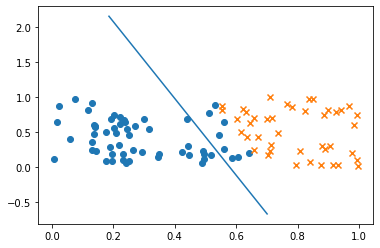

In [6]:
visualize_perceptron(np.append(p.w, p.b), X, Y)

## Estimations

In [7]:
predictions = p.predict(X_test)

#### Contingency matrix:

In [8]:
contingency_table(Y_test, predictions)

array([[ 6,  0],
       [ 2, 12]])

#### Accuracy, precision, recall:

In [9]:
print(f"Accuracy: {accuracy(Y_test, predictions).round(2)}\n"
      f"Precision: {precision(Y_test, predictions).round(2)}\n"
      f"Recall: {recall(Y_test, predictions).round(2)}")

Accuracy: 0.9
Precision: 0.75
Recall: 1.0


## Using perceptron from sklearn

In [10]:
skl_perc = skl_perc().fit(X_train, Y_train)

## Estimations

In [11]:
predictions = skl_perc.predict(X_test)

#### Contingency matrix:

In [12]:
contingency_table(Y_test, predictions)

array([[ 6,  0],
       [ 1, 13]])

#### Accuracy, precision, recall:

In [13]:
print(f"Accuracy: {accuracy(Y_test, predictions).round(2)}\n"
      f"Precision: {precision(Y_test, predictions).round(2)}\n"
      f"Recall: {recall(Y_test, predictions).round(2)}")

Accuracy: 0.95
Precision: 0.86
Recall: 1.0
